## Deep Learning ChatBot

    Table Of Contents : 
        - Loading Data
        - Splitting the data into sentences , labels , responses
        - Simple Baseline Using Logistic Regression
        - Encoding The Data Labels
        - NLP Text Tokannize , clean
        - Neural Network Baseline
        - Neural Model Using Embedding Layer
        - Model With Deep Neural Network
        - Model With CNN & Embedding
        - Sentment Analysis
        - Naive Bayes & Random Forest Classifier
        - Chat Demo

### Importing Libraries 

In [22]:
import json 
import numpy as np 
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D , GlobalMaxPooling1D,Flatten ,Conv1D, Dropout , Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Intents Files  

In [17]:
with open('intents.json') as file:
    data = json.load(file)

### Splitting the data into sentences , labels , responses 

In [18]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [19]:
len(set(training_labels))

46

In [21]:
training_sentences

['What to do if Cuts?',
 'How to cure Cuts?',
 'Which medicine to apply for Cuts?',
 'what to apply on cuts?',
 'Cuts',
 'Hi',
 'How are you',
 'Is anyone there?',
 'Hello',
 'Whats up',
 'cya',
 'See you later',
 'Goodbye',
 'I am Leaving',
 'Have a Good day',
 'bye',
 'how do you treat abrasions?',
 'Do Abrasions cause scars?',
 'Abrasions',
 'what to do if abrasions?',
 'Which medicine to apply for abrasions?',
 'How to cure abrasions?',
 'How do you treat Sting?',
 'Stings',
 'What to do if you get a sting?',
 'Which medicine to apply if sting?',
 'How to remove Splinters',
 'How to cure Splinters?',
 'What to do if I have splinters?',
 'How do you bring a splinter to the surface?',
 'How do you treat a sprain?',
 'what to do if i get a sprain?',
 'Which cream to apply if i get a sprain?',
 'Which medicine to apply if I get a sprain?',
 'How do you treat a strain?',
 'what to do if i get a strain?',
 'Which cream to apply if i get a strain?',
 'Which medicine to apply if I get a st

In [23]:
training_labels

['Cuts',
 'Cuts',
 'Cuts',
 'Cuts',
 'Cuts',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'stings',
 'stings',
 'stings',
 'stings',
 'Splinter',
 'Splinter',
 'Splinter',
 'Splinter',
 'Sprains',
 'Sprains',
 'Sprains',
 'Sprains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Fever',
 'Fever',
 'Fever',
 'Fever',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Cough',
 'Cough',
 'Cough',
 'Cough',
 'Cough',
 'Sore Throat',
 'Sore Throat',
 'Sore Throat',
 'Sore Throat',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Skin problems',
 'Skin problems',
 'Skin problems',
 'Skin problems',
 'Abdonominal Pain',
 'Abdonominal Pain',
 'Ab

----
### Simple Baseline Using Logistic Regression 

In [24]:
sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

sentences_vectorizer = CountVectorizer()
sentences_vectorizer.fit(sentences_train)
Xlr_train = sentences_vectorizer.transform(sentences_train)
Xlr_test  = sentences_vectorizer.transform(sentences_test)
Xlr_train 

<159x129 sparse matrix of type '<class 'numpy.int64'>'
	with 900 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(Xlr_train, label_train)

score_train = LRmodel.score(Xlr_train, label_train)

score_test = LRmodel.score(Xlr_test, label_test)

print("Accuracy Train :", score_train) 
print("Accuracy Test :", score_test) 

Accuracy: 0.575


----------------------------------
### Encoding The Data Labels

In [41]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)
training_labels

array([ 9,  9,  9,  9,  9, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40,  1,
        1,  1,  1,  1,  1, 45, 45, 45, 45, 31, 31, 31, 31, 32, 32, 32, 32,
       33, 33, 33, 33, 33, 33, 14, 14, 14, 14, 23, 23, 23, 23, 23, 23,  8,
        8,  8,  8,  8, 30, 30, 30, 30, 17, 17, 17, 17, 29, 29, 29, 29,  0,
        0,  0,  0,  3,  3,  3,  3,  2,  2,  2,  2,  6,  6,  6,  6, 38, 38,
       38, 38, 10, 10, 10, 10, 16, 16, 16, 16, 20, 20, 20, 20, 21, 21, 21,
       21, 22, 22, 22, 22, 42, 42, 42, 42, 26, 26, 26, 26, 28, 28, 28, 28,
       34, 34, 34, 34, 36, 36, 36, 36, 37, 37, 37, 37, 24, 24, 24, 24, 12,
       12, 12, 12,  5,  5,  5,  5, 25, 25, 25, 25, 35, 35, 35, 35, 43, 43,
       43, 43, 18, 18, 18, 18, 13, 13, 13, 13, 19, 19, 19, 19,  7,  7,  7,
        7, 27, 27, 27, 27, 44, 44, 44, 44, 44, 39, 39, 39, 39, 39, 39, 39,
       11, 11, 11, 11,  4,  4,  4,  4, 15, 15, 15, 15])

### NLP Text Tokannize , clean 

In [125]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token) # adding out of vocabulary token
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

### Neural Network Baseline

In [126]:
baseline = Sequential()
baseline.add(Dense(128, activation='relu'))
baseline.add(Dense(128, activation='relu'))
baseline.add(Dense(num_classes, activation='softmax'))


baseline.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_nn = baseline.fit(padded_sequences,np.array(training_labels), epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 11.6937 - accuracy: 0.0251
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 6.9175 - accuracy: 0.0352
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 5.1431 - accuracy: 0.0503
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 4.0215 - accuracy: 0.1005
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 3.4765 - accuracy: 0.1206
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 3.2179 - accuracy: 0.1508
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 3.0471 - accuracy: 0.1759
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.8773 - accuracy: 0.1859
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.7433 - accuracy: 0.2312
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 2.6773 - accuracy: 0.2462


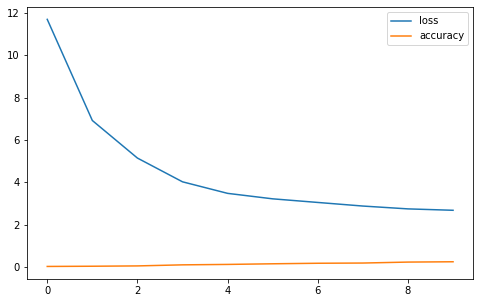

In [127]:
pd.DataFrame(baseline_nn.history).plot(figsize=(8,5))
plt.show()

### Buidling The Neural Model Using Embedding Layer 

In [128]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_79 (Dense)            (None, 16)                272       
                                                                 
 dense_80 (Dense)            (None, 16)                272       
                                                                 
 dense_81 (Dense)            (None, 46)                782       
                                                                 
Total params: 17,326
Trainable params: 17,326
Non-trainable params: 0
_________________________________________________

### Train The Model On Our Data
    - adding the early stop to know the proper epoch count , starting after 200

In [130]:
epochs = 300
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=200)
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs , callbacks=[es])

Epoch 1/300
7/7 [==============================] - 1s 2ms/step - loss: 3.8296 - accuracy: 0.0201
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 3.8285 - accuracy: 0.0251
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 3.8276 - accuracy: 0.0251
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8271 - accuracy: 0.0251
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 3.8265 - accuracy: 0.0251
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 3.8260 - accuracy: 0.0251
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 3.8253 - accuracy: 0.0251
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 3.8245 - accuracy: 0.0251
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 3.8238 - accuracy: 0.0251
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8229 - accuracy: 0.0402
Epoch 11/300
7/7 [===========

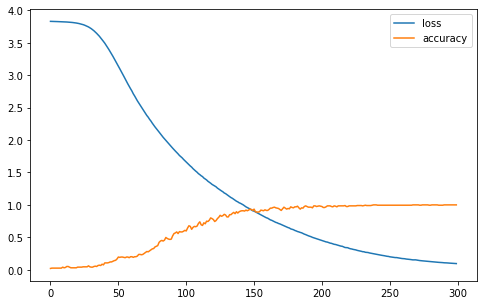

In [131]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Saving The Model , Tokenizer , Encoded Labels

In [132]:
import pickle

model.save("chat_model")

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


---------
### Build The Model With Deep Neural Network

In [9]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json', encoding='utf-8').read()

for intent in data['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)

        documents.append((w, intent['tag']))


        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)

print (len(words), "unique words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

199 documents
46 classes ['Abdonominal Pain', 'Abrasions', 'Broken Toe', 'Bruises', 'CPR', 'Chemical Burn', 'Choking', 'Cold', 'Cough', 'Cuts', 'Diarrhea', 'Drowning', 'Eye Injury', 'Fainting', 'Fever', 'Fracture', 'Frost bite', 'Gastrointestinal problems', 'Head Injury', 'Headache', 'Heat Exhaustion', 'Heat Stroke', 'Insect Bites', 'Nasal Congestion', 'Normal Bleeding', 'Poison', 'Pulled Muscle', 'Rash', 'Rectal bleeding', 'Skin problems', 'Sore Throat', 'Splinter', 'Sprains', 'Strains', 'Sun Burn', 'Teeth', 'Testicle Pain', 'Vertigo', 'Wound', 'animal bite', 'goodbye', 'greeting', 'nose bleed', 'seizure', 'snake bite', 'stings']
138 unique words ['a', 'abdonominal', 'abrasion', 'allergy', 'am', 'an', 'animal', 'anyone', 'apply', 'are', 'better', 'bit', 'bite', 'bitten', 'bleed', 'bleeding', 'blocked', 'bring', 'broken', 'bruise', 'burn', 'by', 'bye', 'cause', 'chemical', 'choke', 'choked', 'choking', 'cold', 'congestion', 'cough', 'cpr', 'cream', 'cure', 'cut', 'cya', 'day', 'diagnos

In [12]:
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:

    bag = []

    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)


    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)
training

<ipython-input-12-267d94db582c>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


array([[list([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [list([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [13]:
train_x = list(training[:,0])
train_y = list(training[:,1])
sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

In [14]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
40/40 [==============================] - 1s 2ms/step - loss: 3.8663 - accuracy: 0.0151
Epoch 2/150
40/40 [==============================] - 0s 2ms/step - loss: 3.8048 - accuracy: 0.0302
Epoch 3/150
40/40 [==============================] - 0s 2ms/step - loss: 3.7649 - accuracy: 0.0603
Epoch 4/150
40/40 [==============================] - 0s 2ms/step - loss: 3.7081 - accuracy: 0.0854
Epoch 5/150
40/40 [==============================] - 0s 2ms/step - loss: 3.6328 - accuracy: 0.1357
Epoch 6/150
40/40 [==============================] - 0s 2ms/step - loss: 3.4761 - accuracy: 0.1658
Epoch 7/150
40/40 [==============================] - 0s 2ms/step - loss: 3.3068 - accuracy: 0.2111
Epoch 8/150
40/40 [==============================] - 0s 3ms/step - loss: 3.0810 - accuracy: 0.2663
Epoch 9/150
40/40 [==============================] - 0s 3ms/step - loss: 2.7790 - accuracy: 0.3166
Epoch 10/150
40/40 [==============================] - 0s 2ms/step - loss: 2.5240 - accuracy: 0.3618
Epoch 11/

In [ ]:
loss, accuracy = model.evaluate(np.array(train_x), np.array(train_y), verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

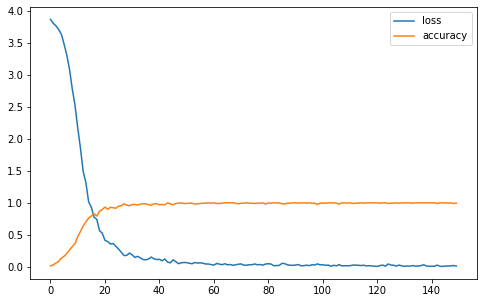

In [15]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

------
## Build The Model With Conv

In [42]:
from keras.preprocessing.text import Tokenizer


sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
Xcnn_train = tokenizer.texts_to_sequences(sentences_train)
Xcnn_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  
print(sentences_train[1])
print(Xcnn_train[1]) 

What to do if you get a sting?
[9, 1, 2, 5, 8, 7, 3, 42]


In [43]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :]) 

[ 4  1 14 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [44]:
embedding_dim = 200
textcnnmodel = Sequential()
textcnnmodel.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(Conv1D(128, 5, activation='relu'))
textcnnmodel.add(GlobalMaxPooling1D())
textcnnmodel.add(Dense(10, activation='relu'))
textcnnmodel.add(Dense(1, activation='sigmoid'))

textcnnmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 200)          26400     
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 155,829
Trainable params: 155,829
Non-trainable params: 0
________________________________________________

In [46]:

textmodel = textcnnmodel.fit(Xcnn_train, np.array(label_train),epochs=50,verbose=1,validation_data=(Xcnn_test, label_test),batch_size=10)

loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/50
16/16 [==============================] - 0s 21ms/step - loss: -77001808.0000 - accuracy: 0.0314 - val_loss: -86051696.0000 - val_accuracy: 0.0250
Epoch 2/50
16/16 [==============================] - 0s 19ms/step - loss: -83261096.0000 - accuracy: 0.0314 - val_loss: -92579600.0000 - val_accuracy: 0.0250
Epoch 3/50
16/16 [==============================] - 0s 17ms/step - loss: -89538304.0000 - accuracy: 0.0314 - val_loss: -99763816.0000 - val_accuracy: 0.0250
Epoch 4/50
16/16 [==============================] - 0s 18ms/step - loss: -96279568.0000 - accuracy: 0.0314 - val_loss: -107352432.0000 - val_accuracy: 0.0250
Epoch 5/50
16/16 [==============================] - 0s 18ms/step - loss: -103415088.0000 - accuracy: 0.0314 - val_loss: -115281832.0000 - val_accuracy: 0.0250
Epoch 6/50
16/16 [==============================] - 0s 17ms/step - loss: -111063120.0000 - accuracy: 0.0314 - val_loss: -123367152.0000 - val_accuracy: 0.0250
Epoch 7/50
16/16 [==============================] - 0

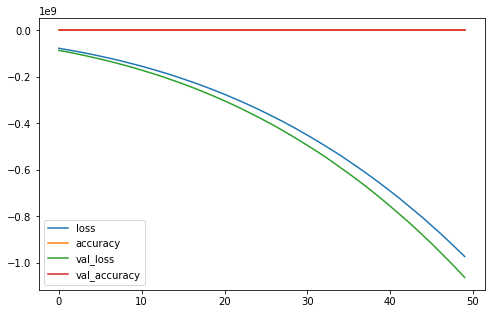

In [47]:
pd.DataFrame(textmodel.history).plot(figsize=(8,5))
plt.show()

------
### Sentment Analysis

In [23]:
df = pd.read_excel('classify (2).xlsx')

In [25]:
df.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Tags,isdanger,Taxt
1,"""Cuts",1,"[""What to do if Cuts?"", ""How to cure Cuts?"", ""..."
2,Abrasions,0,"""how do you treat abrasions?"", ""Do Abrasions c..."
3,"""stings",1,"""How do you treat Sting?"", ""Stings"", ""What to ..."
4,"""Splinter",1,"""How to remove Splinters"", ""How to cure Splint..."
5,Sprains,0,"How do you treat a sprain?"", ""what to do if i ..."
6,Sore Throat,0,"""How do you treat sore throat?"", ""what to do i..."
7,Abdonominal Pain,0,"minal Pain"",\n ""patterns"": [""How do y..."
8,Fever,1,"How do you treat a mild Fever?"", ""what to do i..."


In [8]:
import neattext.functions as nf

df['Taxt'] = df['Taxt'].apply(nf.clean_text)

In [9]:
cleaned_data = [sentence for sentence in df['Taxt']]
cleaned_data

['["what cuts?", "how cure cuts?", "which medicine apply cuts?", "what apply cuts?", "cuts"], ["wash cut properly prevent infection stop bleeding applying pressure 1-2minutes bleeding stops. apply petroleum jelly sure wound moist quick healing. finally cover cut sterile bandage. pain relievers acetaminophen applied.',
 '"how treat abrasions?", "do abrasions cause scars?", "abrasions", "what abrasions?", "which medicine apply abrasions?", "how cure abrasions?"], "responses": ["begin washed hands.gently clean area cool lukewarm water mild soap. remove dirt particles wound sterilized tweezers.for mild scrape that’s bleeding, leave wound uncovered.if wound bleeding, use clean cloth bandage, apply gentle pressure area stop bleeding.cover wound bled thin layer topical antibiotic ointment, like bacitracin, sterile moisture barrier ointment, like aquaphor. cover clean bandage gauze. gently clean wound change ointment bandage day.watch area signs infection, like pain redness swelling. doctor su

In [15]:
## Data Transformation 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1400)
x = cv.fit_transform(cleaned_data).toarray()
y = df.iloc[:,-2].values

In [16]:
## Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [18]:
# Test
y_pred = nb_model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])


[1 1]
[0 0]


In [19]:
# Evaluate
from sklearn.metrics import accuracy_score

y_pred = nb_model.predict(X_test)

accuracy_score(y_test,y_pred)

0.0

In [20]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

# Test
y_pred = rf_model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

[1 1]
[0 0]


In [21]:
accuracy_score(y_test,y_pred)

0.0

-----
## Demo

In [1]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import random
import pickle

with open("intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print("User: " ,end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print("Mosif ChatBot:" , np.random.choice(i['responses']))

print("Start messaging with the Mosif bot (type quit to stop)!")
chat()

Start messaging with the Mosif bot (type quit to stop)!
User: hi
Mosif ChatBot: Hi , i am Mosif your paramedic assistant
User: I have cuts
Mosif ChatBot: Wash the cut properly to prevent infection and stop the bleeding by applying pressure for 1-2minutes until bleeding stops. Apply Petroleum Jelly to make sure that the wound is moist for quick healing. Finally cover the cut with a sterile bandage. Pain relievers such as acetaminophen can be applied.
User: quit
